# Importing all the Required Packages

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
#from sklearn.inspection import partial_dependence
from sklearn.model_selection import train_test_split
#from sklearn.inspection import plot_partial_dependence
import matplotlib.pyplot as plt

In [14]:
#!pip install scikit-learn scipy matplotlib
#!pip install graphviz

In [13]:
import graphviz

In [16]:
import os
os.getcwd()

'/Users/vdodwani/Documents/GitHub/ds-shrinkage/app/adhoc/SHR-252'

In [3]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

# Import Data and Create Clusterwise Data Sets

In [17]:
data = pd.read_csv("All_Store_inc_Gemini_Shrink_2023_06_16.csv")

test_data_to_predict = pd.read_csv("Future_Stk_Stores_inc_Gemini_Data_20230616.csv")

In [244]:

test_data_to_predict.head()


,LOCATION_SOURCE_IDENTIFIER,LOCATION_GENERATED_IDENTIFIER,Metro_NonMetro,START_DATE,END_DATE,ADJ_START_DATE,START_DATE_ADJ_TYPE,TOT_SHRINK_QTY_ZERO_SLS,TOT_SHRINK_QTY,TOT_SHRINK_AMT_ZERO_SLS,...,FAMILY_TECH_KNOWN_SR_RATE,COSMETIC_ALL_SR_RATE,APPLIANCE_ALL_SR_RATE,DOLL_ALL_SR_RATE,TOY_ALL_SR_RATE,FAMILY_TECH_ALL_SR_RATE,ONLINE_FIRST_DIF_PERCENT,SCO_INTERVENTION_PERCENT,Previous_Shrink_Amt_Rate,PREV_STOCKTAKE_SHRINK_PERCENT
0,1167,1.040000e+12,Non Metro,5/3/2023,11/6/2023,19/2/2023,STK_ADJ,-222,-5668,-2114.53,...,-0.012596,-0.039003,-0.025590,-0.024334,-0.018477,-0.013086,0.839458,0.143605,-0.019006,0.503847
1,1132,1.040000e+12,Non Metro,5/3/2023,11/6/2023,19/2/2023,STK_ADJ,-191,-7488,-1859.61,...,-0.013185,-0.027558,-0.020815,-0.009313,-0.012983,-0.018276,0.877916,0.167790,-0.014719,0.247631
2,1135,1.040000e+12,Non Metro,5/3/2023,11/6/2023,19/2/2023,STK_ADJ,-1057,-15211,-7443.52,...,-0.018025,-0.032504,-0.026140,-0.009478,-0.017397,-0.028025,0.809754,0.155664,-0.016629,0.474639
3,1007,1.040000e+12,Metro,5/3/2023,11/6/2023,19/2/2023,STK_ADJ,-749,-27291,-6111.07,...,-0.020176,-0.034709,-0.022565,-0.005807,-0.016130,-0.024508,0.904330,0.168117,-0.018556,0.514563
4,1358,1.040000e+12,Non Metro,5/3/2023,11/6/2023,19/2/2023,STK_ADJ,-302,-7867,-1956.52,...,-0.018370,-0.032170,-0.020292,-0.007786,-0.023956,-0.032670,0.866028,0.051213,-0.035629,0.528136


In [245]:
test_data_to_predict['Shrink_Amt_Rate'] = test_data_to_predict['TOT_SHRINK_AMT']/test_data_to_predict['TOT_SALES_AMT']
test_data_to_predict_Metro = test_data_to_predict[test_data_to_predict["Metro_NonMetro"] == "Metro"]
test_data_to_predict_NonMetro = test_data_to_predict[test_data_to_predict["Metro_NonMetro"] == "Non Metro"]

In [20]:
data.rename(columns = {'SHRINK_AMT_RATE':'Shrink_Amt_Rate'},inplace=True)

In [21]:
data_Metro = data[data["Metro_NonMetro"] == "Metro"]
data_NonMetro = data[data["Metro_NonMetro"] == "Non Metro"]

In [22]:
data_Metro.shape

(745, 78)

In [23]:
data_NonMetro.shape

(275, 78)

In [26]:
data.head()

,LOCATION_SOURCE_IDENTIFIER,LOCATION_GENERATED_IDENTIFIER,Metro_NonMetro,ADJ_START_DATE,START_DATE,START_DATE_ADJ_TYPE,ADJ_END_DATE,END_DATE,END_DATE_ADJ_TYPE,TOT_SHRINK_QTY_ZERO_SLS,...,FAMILY_TECH_KNOWN_SR_RATE,COSMETIC_ALL_SR_RATE,APPLIANCE_ALL_SR_RATE,DOLL_ALL_SR_RATE,TOY_ALL_SR_RATE,FAMILY_TECH_ALL_SR_RATE,ONLINE_FIRST_DIF_PERCENT,SCO_INTERVENTION_PERCENT,Previous_Shrink_Amt_Rate,PREV_STOCKTAKE_SHRINK_PERCENT
0,1001,1.040000e+12,Metro,28/2/2021,14/3/2021,STK_ADJ,13/2/2022,20/2/2022,STK_ADJ,-1576,...,-0.020559,-0.041091,-0.029079,-0.005326,-0.011728,-0.034058,0.795414,0.197099,-0.019081,0.354875
1,1001,1.040000e+12,Metro,16/2/2020,1/3/2020,STK_ADJ,28/2/2021,7/3/2021,STK_ADJ,-1226,...,-0.019971,-0.054332,-0.035196,-0.008004,-0.015803,-0.032774,0.750637,0.139665,-0.026184,0.334135
2,1001,1.040000e+12,Metro,10/2/2019,24/2/2019,STK_ADJ,16/2/2020,23/2/2020,STK_ADJ,-1369,...,-0.021367,-0.099843,-0.041203,-0.032578,-0.025000,-0.037932,0.716111,0.136913,-0.019978,0.259511
3,1002,1.040000e+12,Metro,13/2/2022,27/2/2022,STK_ADJ,14/8/2022,21/8/2022,STK_ADJ,-2854,...,-0.029718,-0.064786,-0.031298,-0.005221,-0.016277,-0.039495,0.415258,0.216678,-0.023039,0.677556
4,1002,1.040000e+12,Metro,15/8/2021,29/8/2021,STK_ADJ,13/2/2022,20/2/2022,STK_ADJ,-1122,...,-0.015934,-0.027244,-0.021209,-0.010270,-0.014740,-0.017461,0.688810,0.230775,-0.025104,0.481616


In [24]:
data_Metro.columns

Index(['LOCATION_SOURCE_IDENTIFIER', 'LOCATION_GENERATED_IDENTIFIER',
       'Metro_NonMetro', 'ADJ_START_DATE', 'START_DATE', 'START_DATE_ADJ_TYPE',
       'ADJ_END_DATE', 'END_DATE', 'END_DATE_ADJ_TYPE',
       'TOT_SHRINK_QTY_ZERO_SLS', 'TOT_SHRINK_QTY', 'TOT_SHRINK_AMT_ZERO_SLS',
       'TOT_KNOWN_SHRINK_AMT', 'TOT_SHRINK_AMT', 'TOT_SALES_QTY',
       'TOT_SALES_AMT', 'AVG_SALES_AMT', 'Shrink_Amt_Rate', 'TOT_GAPSCAN_QTY',
       'TOT_GAPSCAN_AMT', 'AVG_GAPSCAN_QTY', 'AVG_GAPSCAN_AMT',
       'PROD_CNT_ZERO_SLS', 'PROD_CNT', 'ONLINE_SHRINK_QTY',
       'ONLINE_SHRINK_AMT', 'HEAD_OFFICE_ADJ_QTY', 'HEAD_OFFICE_ADJ_AMT',
       'REFUND_NO_RECEIPT_TRAN', 'REFUND_TRAN', 'TOTAL_REFUND_QTY',
       'TOTAL_REFUND_NO_RECEIPT_QTY', 'SELF_CHECKOUT_TRAN', 'PURCHASE_TRAN',
       'TOTAL_TRAN', 'HOUSE_MANIFEST_QTY', 'ALL_MANIFEST_QTY', 'NEG_SOH_QTY',
       'NEG_SOH_COST_AMT', 'NEG_SOH_PROD_CNT', 'AVG_SOH_QTY',
       'AVG_SOH_COST_AMT', 'AVG_NEG_SOH_QTY', 'AVG_NEG_SOH_COST_AMT',
       'AVG_NEG_

In [25]:
test_data_to_predict_Metro.columns

Index(['LOCATION_SOURCE_IDENTIFIER', 'LOCATION_GENERATED_IDENTIFIER',
       'Metro_NonMetro', 'START_DATE', 'END_DATE', 'ADJ_START_DATE',
       'START_DATE_ADJ_TYPE', 'TOT_SHRINK_QTY_ZERO_SLS', 'TOT_SHRINK_QTY',
       'TOT_SHRINK_AMT_ZERO_SLS', 'TOT_KNOWN_SHRINK_AMT', 'TOT_SHRINK_AMT',
       'TOT_SALES_QTY', 'TOT_SALES_AMT', 'AVG_SALES_AMT', 'Shrink_Amt_Rate',
       'TOT_GAPSCAN_QTY', 'TOT_GAPSCAN_AMT', 'AVG_GAPSCAN_QTY',
       'AVG_GAPSCAN_AMT', 'PROD_CNT_ZERO_SLS', 'PROD_CNT', 'ONLINE_SHRINK_QTY',
       'ONLINE_SHRINK_AMT', 'HEAD_OFFICE_ADJ_QTY', 'HEAD_OFFICE_ADJ_AMT',
       'REFUND_NO_RECEIPT_TRAN', 'REFUND_TRAN', 'TOTAL_REFUND_QTY',
       'TOTAL_REFUND_NO_RECEIPT_QTY', 'SELF_CHECKOUT_TRAN', 'PURCHASE_TRAN',
       'TOTAL_TRAN', 'HOUSE_MANIFEST_QTY', 'ALL_MANIFEST_QTY', 'NEG_SOH_QTY',
       'NEG_SOH_COST_AMT', 'NEG_SOH_PROD_CNT', 'AVG_SOH_QTY',
       'AVG_SOH_COST_AMT', 'AVG_NEG_SOH_QTY', 'AVG_NEG_SOH_COST_AMT',
       'AVG_NEG_SOH_PROD_CNT', 'AVG_PROD_CNT', 'AVG_WEEKLY_T

# Model Predictions

In [410]:
test_data_to_predict_Metro.head()

,LOCATION_SOURCE_IDENTIFIER,LOCATION_GENERATED_IDENTIFIER,Metro_NonMetro,START_DATE,END_QUARTER_DATE,END_QUARTER_DATE_TYPE,ADJ_START_DATE,ADJ_END_DATE,TOT_SHRINK_QTY_ZERO_SLS,TOT_SHRINK_QTY,TOT_SHRINK_AMT_ZERO_SLS,TOT_KNOWN_SHRINK_AMT,TOT_SHRINK_AMT,TOT_SALES_QTY,TOT_SALES_AMT,AVG_SALES_AMT,SHRINK_AMT_RATE_CALCULATED,TOT_GAPSCAN_QTY,TOT_GAPSCAN_AMT,AVG_GAPSCAN_QTY,AVG_GAPSCAN_AMT,PROD_CNT_ZERO_SLS,PROD_CNT,ONLINE_SHRINK_QTY,ONLINE_SHRINK_AMT,HEAD_OFFICE_ADJ_QTY,HEAD_OFFICE_ADJ_AMT,REFUND_NO_RECEIPT_TRAN,REFUND_TRAN,TOTAL_REFUND_QTY,TOTAL_REFUND_NO_RECEIPT_QTY,SELF_CHECKOUT_TRAN,PURCHASE_TRAN,TOTAL_TRAN,HOUSE_MANIFEST_QTY,ALL_MANIFEST_QTY,NEG_SOH_QTY,NEG_SOH_COST_AMT,NEG_SOH_PROD_CNT,AVG_SOH_QTY,AVG_SOH_COST_AMT,AVG_NEG_SOH_QTY,AVG_NEG_SOH_COST_AMT,AVG_NEG_SOH_PROD_CNT,AVG_PROD_CNT,REFUND_TRAN_PERCENT,REFUND_QTY_PERCENT,REFUND_NO_RECEIPT_PERCENT,REFUND_NO_RECEIPT_QTY_PERCENT,SELF_CHECKOUT_PERCENT,AVG_GAPSCAN_AMT_PERCENT,AVG_GAPSCAN_QTY_PERCENT,AVG_HEAD_OFFICE_AMT_PERCENT,AVG_HEAD_OFFICE_QTY_PERCENT,HOUSE_MANIFEST_QTY_PERCENT,AVG_NEG_SOH_QTY_PERCENT,AVG_NEG_SOH_AMT_PERCENT,AVG_NEG_SOH_PROD_CNT_PERCENT,KNOWN_SHRINK_AMT_PERCENT,ALL_SHRINK_WO_STK_AMT_PERCENT,ONLINE_FIRST_DIF_PERCENT,SCO_INTERVENTION_PERCENT,Previous_Shrink_Amt_Rate,COSMETIC_ALL_SR_RATE,APPLIANCE_ALL_SR_RATE,DOLL_ALL_SR_RATE,TOY_ALL_SR_RATE,FAMILY_TECH_ALL_SR_RATE,COSMETIC_KNOWN_SR_RATE,APPLIANCE_KNOWN_SR_RATE,DOLL_KNOWN_SR_RATE,TOY_KNOWN_SR_RATE,FAMILY_TECH_KNOWN_SR_RATE,Shrink_Amt_Rate
0,1157,1.040000e+12,Metro,24/05/2020,22/11/2020,SIXTH_MONTH_DATE,10/05/2020,28/02/2021,-483,-22378,-4643.42,-61266.09,-121425.53,1387559,10822400.02,4.008296e+05,-0.011220,-12001,-54069.18,-444.481481,-2002.562222,1032,79664,-835,-5818.25,-835,-5818.25,2607,11723,-25621,-5129,147974,218809,241939,3253,1511125,-13473,-68416,5901,366754.0000,1587823.593,-7661.296296,-39246.07407,3525.962963,53448.25926,0.048454,-0.018465,0.222383,0.200187,0.676270,-0.001261,-0.001212,-0.000136,-0.000084,0.002153,-0.020889,-0.024717,0.065970,-0.005661,-0.011220,0.718226,0.105008,-0.0321,-0.032069,-0.040487,-0.009019,-0.014907,-0.025836,-0.020604,-0.030548,-0.003180,-0.008518,-0.018089,-0.028798
1,1036,1.040000e+12,Metro,8/09/2019,7/06/2020,NINTH_MONTH_DATE,25/08/2019,28/02/2021,-444,-91331,-5896.56,-132291.46,-477639.01,3351733,24699164.10,6.174791e+05,-0.019338,-65860,-328884.65,-1646.500000,-8222.116250,1105,102967,-172,-1269.80,-172,-1269.80,4902,29768,-49716,-7823,734296,800792,847371,12075,3232886,-27263,-131609,9476,428176.2750,1908439.350,-13550.575000,-66268.55000,5375.325000,63178.80000,0.035130,-0.014833,0.164673,0.157354,0.916962,-0.004308,-0.003845,-0.000017,-0.000010,0.003735,-0.031647,-0.034724,0.085081,-0.005356,-0.019338,0.576524,0.135649,-0.0296,-0.140996,-0.036418,-0.043393,-0.026926,-0.051639,-0.025346,-0.021939,-0.002289,-0.008671,-0.019538,-0.032540
2,1016,1.040000e+12,Metro,24/05/2020,22/11/2020,SIXTH_MONTH_DATE,10/05/2020,28/02/2021,-386,-16901,-4060.02,-47585.83,-96418.04,1153696,9390688.01,3.478033e+05,-0.010267,-8137,-39901.14,-301.370370,-1477.820000,833,76181,-1284,-8514.09,-1284,-8514.09,1746,10216,-18863,-2898,122534,175163,192012,1593,1249051,-7386,-40519,3534,349471.0000,1564877.148,-3832.185185,-21557.25926,1901.000000,50931.11111,0.053205,-0.016350,0.170908,0.153634,0.699543,-0.000944,-0.000862,-0.000202,-0.000136,0.001275,-0.010966,-0.013776,0.037325,-0.005067,-0.010267,0.877557,0.113637,-0.0174,-0.025756,-0.028522,-0.006040,-0.018019,-0.020950,-0.012593,-0.023287,-0.001960,-0.008659,-0.013019,-0.019702
5,1097,1.040000e+12,Metro,1/03/2020,29/11/2020,NINTH_MONTH_DATE,16/02/2020,28/02/2021,-916,-97738,-4357.62,-186557.63,-470993.37,5641768,43729945.52,1.093249e+06,-0.010771,-60528,-267086.69,-1513.200000,-6677.167250,2039,100727,-723,-5215.04,-723,-5215.04,9942,53001,-102384,-18570,825315,1002352,1089109,5284,5858859,-31675,-164289,10916,483030.1500,2151992.325,-24289.825000,-122350.15000,8133.075000,64023.67500,0.048665,-0.018148,0.187581,0.181376,0.823378,-0.003103,-0

In [256]:
Y = test_data_to_predict_Metro['Shrink_Amt_Rate']
#Y = test_data_to_predict_Metro['SHRINK_AMT_RATE_CALCULATED']
X =  test_data_to_predict_Metro[[
           #'LOCATION_SOURCE_IDENTIFIER',
           #'START_DATE', 'END_QUARTER_DATE',
           #'LOCATION_SOURCE_IDENTIFIER',
           #'START_DATE', 'END_DATE',
           'AVG_WEEKLY_TRAN',
           'GAPSCAN_PERCENT_WEEKS',
           'AVG_GAPSCAN_PROD_CNT',
           #'REFUND_TRAN_PERCENT',
           'REFUND_QTY_PERCENT',
           'REFUND_NO_RECEIPT_PERCENT',
           #'REFUND_NO_RECEIPT_QTY_PERCENT', 
           #'SELF_CHECKOUT_PERCENT',
           'AVG_GAPSCAN_AMT_PERCENT',
           #'AVG_GAPSCAN_QTY_PERCENT',
           'AVG_HEAD_OFFICE_AMT_PERCENT', 
           #'AVG_HEAD_OFFICE_QTY_PERCENT',
           'HOUSE_MANIFEST_QTY_PERCENT', 
           #'AVG_NEG_SOH_QTY_PERCENT',
           #'AVG_NEG_SOH_AMT_PERCENT', 
           #'AVG_NEG_SOH_PROD_CNT_PERCENT',
           'KNOWN_SHRINK_AMT_PERCENT',
           'ALL_SHRINK_WO_STK_AMT_PERCENT',
           'ONLINE_FIRST_DIF_PERCENT',
           'SCO_INTERVENTION_PERCENT',
           #'AVG_SOH_COST_AMT', 
           #'AVG_SALES_AMT',
           'AVG_GAPSCAN_AMT',
           'Previous_Shrink_Amt_Rate',
           'PREV_STOCKTAKE_SHRINK_PERCENT',
           'COSMETIC_KNOWN_SR_RATE',
           #'APPLIANCE_KNOWN_SR_RATE', 
           'DOLL_KNOWN_SR_RATE', 
           #'TOY_KNOWN_SR_RATE',
           'FAMILY_TECH_KNOWN_SR_RATE',
           #'COSMETIC_ALL_SR_RATE', 
           'APPLIANCE_ALL_SR_RATE', 
           'DOLL_ALL_SR_RATE',
           'TOY_ALL_SR_RATE',
           'FAMILY_TECH_ALL_SR_RATE'
        ]]

predictions = model_Metro.predict(X)
# Performance metrics
#errors = abs(predictions - Y)
errors = predictions - Y
abs_errors = abs(predictions - Y)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(abs_errors), 5), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (abs_errors / Y)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
test_data_to_predict_Metro["Predicted_Shrink"] = predictions

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.01753 degrees.
Accuracy: 507.33 %.


/var/folders/zn/8yvk6vl52pz8vrgn684th49jyn3vf8/T/ipykernel_47336/3389721109.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_to_predict_Metro["Predicted_Shrink"] = predictions


In [258]:
test_data_to_predict_Metro.shape

(169, 77)

In [260]:
#Y = test_data_to_predict_NonMetro['SHRINK_AMT_RATE_CALCULATED']
Y = test_data_to_predict_NonMetro['Shrink_Amt_Rate']
X =  test_data_to_predict_NonMetro[[
           #'LOCATION_SOURCE_IDENTIFIER',
           #'START_DATE', 'END_QUARTER_DATE',
           #'LOCATION_SOURCE_IDENTIFIER',
           #'START_DATE', 'END_DATE',
           'AVG_WEEKLY_TRAN',
           'GAPSCAN_PERCENT_WEEKS',
           'AVG_GAPSCAN_PROD_CNT',
           'REFUND_TRAN_PERCENT',
           #'REFUND_QTY_PERCENT',
           #'REFUND_NO_RECEIPT_PERCENT',
           #'REFUND_NO_RECEIPT_QTY_PERCENT', 
           'SELF_CHECKOUT_PERCENT',
           'AVG_GAPSCAN_AMT_PERCENT',
           #'AVG_GAPSCAN_QTY_PERCENT',
           #'AVG_HEAD_OFFICE_AMT_PERCENT', 
           'AVG_HEAD_OFFICE_QTY_PERCENT',
           #'HOUSE_MANIFEST_QTY_PERCENT', 
           #'AVG_NEG_SOH_QTY_PERCENT',
           'AVG_NEG_SOH_AMT_PERCENT', 
           'AVG_NEG_SOH_PROD_CNT_PERCENT',
           #'KNOWN_SHRINK_AMT_PERCENT',
           'ALL_SHRINK_WO_STK_AMT_PERCENT',
           'ONLINE_FIRST_DIF_PERCENT',
           #'SCO_INTERVENTION_PERCENT',
           #'AVG_SOH_COST_AMT', 
           #'AVG_SALES_AMT',
           'AVG_GAPSCAN_AMT',
           'Previous_Shrink_Amt_Rate',
           'PREV_STOCKTAKE_SHRINK_PERCENT',
           'COSMETIC_KNOWN_SR_RATE',
           #'APPLIANCE_KNOWN_SR_RATE', 
           'DOLL_KNOWN_SR_RATE', 
           'TOY_KNOWN_SR_RATE',
           'FAMILY_TECH_KNOWN_SR_RATE',
           'COSMETIC_ALL_SR_RATE', 
           'APPLIANCE_ALL_SR_RATE', 
           'DOLL_ALL_SR_RATE',
           #'TOY_ALL_SR_RATE',
           'FAMILY_TECH_ALL_SR_RATE'
        ]]

predictions = model_Non_Metro.predict(X) # RF Model predict using data
# Performance metrics
#errors = abs(predictions - Y)
errors = predictions - Y
abs_errors = abs(predictions - Y) # Get absolute errors
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(abs_errors), 5), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (abs_errors / Y) # Get mean absolute percentage errors (MAPE)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
test_data_to_predict_NonMetro["Predicted_Shrink"] = predictions # Append the predictions to the data with quaterly observations

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.01258 degrees.
Accuracy: -445.87 %.


/var/folders/zn/8yvk6vl52pz8vrgn684th49jyn3vf8/T/ipykernel_47336/2645818116.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_to_predict_NonMetro["Predicted_Shrink"] = predictions # Append the predictions to the data with quaterly observations


In [ ]:
test_data_to_predict_NonMetro.shape

In [262]:
test_data_to_predict_Metro.to_excel("Metro_Pred_20230619.xlsx",index=False)


In [263]:
test_data_to_predict_NonMetro.to_excel("NonMetro_Pred_20230619.xlsx",index=False)

# Metro and Non Metro Model

# Metro Model

In [27]:
data_Metro.head()

,LOCATION_SOURCE_IDENTIFIER,LOCATION_GENERATED_IDENTIFIER,Metro_NonMetro,ADJ_START_DATE,START_DATE,START_DATE_ADJ_TYPE,ADJ_END_DATE,END_DATE,END_DATE_ADJ_TYPE,TOT_SHRINK_QTY_ZERO_SLS,...,FAMILY_TECH_KNOWN_SR_RATE,COSMETIC_ALL_SR_RATE,APPLIANCE_ALL_SR_RATE,DOLL_ALL_SR_RATE,TOY_ALL_SR_RATE,FAMILY_TECH_ALL_SR_RATE,ONLINE_FIRST_DIF_PERCENT,SCO_INTERVENTION_PERCENT,Previous_Shrink_Amt_Rate,PREV_STOCKTAKE_SHRINK_PERCENT
0,1001,1.040000e+12,Metro,28/2/2021,14/3/2021,STK_ADJ,13/2/2022,20/2/2022,STK_ADJ,-1576,...,-0.020559,-0.041091,-0.029079,-0.005326,-0.011728,-0.034058,0.795414,0.197099,-0.019081,0.354875
1,1001,1.040000e+12,Metro,16/2/2020,1/3/2020,STK_ADJ,28/2/2021,7/3/2021,STK_ADJ,-1226,...,-0.019971,-0.054332,-0.035196,-0.008004,-0.015803,-0.032774,0.750637,0.139665,-0.026184,0.334135
2,1001,1.040000e+12,Metro,10/2/2019,24/2/2019,STK_ADJ,16/2/2020,23/2/2020,STK_ADJ,-1369,...,-0.021367,-0.099843,-0.041203,-0.032578,-0.025000,-0.037932,0.716111,0.136913,-0.019978,0.259511
3,1002,1.040000e+12,Metro,13/2/2022,27/2/2022,STK_ADJ,14/8/2022,21/8/2022,STK_ADJ,-2854,...,-0.029718,-0.064786,-0.031298,-0.005221,-0.016277,-0.039495,0.415258,0.216678,-0.023039,0.677556
4,1002,1.040000e+12,Metro,15/8/2021,29/8/2021,STK_ADJ,13/2/2022,20/2/2022,STK_ADJ,-1122,...,-0.015934,-0.027244,-0.021209,-0.010270,-0.014740,-0.017461,0.688810,0.230775,-0.025104,0.481616


#### New 2023 Stocktake Metro Model

In [246]:
##### New 2023 Stocktake Metro Model WITH LAST SHRINK RATE
# Creating Target and Regressor Subsets
Y_Metro = data_Metro['Shrink_Amt_Rate']
X_Metro =  data_Metro[[
#data_Metro_temp = data_Metro[['Shrink_Amt_Rate',
           'LOCATION_SOURCE_IDENTIFIER',
           'START_DATE', 'END_DATE',
           'AVG_WEEKLY_TRAN',
           'GAPSCAN_PERCENT_WEEKS',
           'AVG_GAPSCAN_PROD_CNT',
           #'REFUND_TRAN_PERCENT',
           'REFUND_QTY_PERCENT',
           'REFUND_NO_RECEIPT_PERCENT',
           #'REFUND_NO_RECEIPT_QTY_PERCENT', 
           #'SELF_CHECKOUT_PERCENT',
           'AVG_GAPSCAN_AMT_PERCENT',
           #'AVG_GAPSCAN_QTY_PERCENT',
           'AVG_HEAD_OFFICE_AMT_PERCENT', 
           #'AVG_HEAD_OFFICE_QTY_PERCENT',
           'HOUSE_MANIFEST_QTY_PERCENT', 
           #'AVG_NEG_SOH_QTY_PERCENT',
           #'AVG_NEG_SOH_AMT_PERCENT', 
           #'AVG_NEG_SOH_PROD_CNT_PERCENT',
           'KNOWN_SHRINK_AMT_PERCENT',
           'ALL_SHRINK_WO_STK_AMT_PERCENT',
           'ONLINE_FIRST_DIF_PERCENT',
           'SCO_INTERVENTION_PERCENT',
           #'AVG_SOH_COST_AMT', 
           #'AVG_SALES_AMT',
           'AVG_GAPSCAN_AMT',
           'Previous_Shrink_Amt_Rate',
           'PREV_STOCKTAKE_SHRINK_PERCENT',
           'COSMETIC_KNOWN_SR_RATE',
           #'APPLIANCE_KNOWN_SR_RATE', 
           'DOLL_KNOWN_SR_RATE', 
           #'TOY_KNOWN_SR_RATE',
           'FAMILY_TECH_KNOWN_SR_RATE',
           #'COSMETIC_ALL_SR_RATE', 
           'APPLIANCE_ALL_SR_RATE', 
           'DOLL_ALL_SR_RATE',
           'TOY_ALL_SR_RATE',
           'FAMILY_TECH_ALL_SR_RATE'
        ]]
#train_Metro_raw = data_Metro_temp[data_Metro_temp['END_DATE']!='20/02/2022']
#test_Metro_raw = data_Metro_temp[data_Metro_temp['END_DATE']=='20/02/2022']

# Split the data into train and test data:
X_train_Metro_raw, X_test_Metro_raw, Y_train_Metro, Y_test_Metro = train_test_split(X_Metro, Y_Metro, test_size = 0.2, random_state=123)

"""
Y_train_Metro = train_Metro_raw['Shrink_Amt_Rate']
X_train_Metro_raw = train_Metro_raw.drop(['Shrink_Amt_Rate'], axis=1)
Y_test_Metro = test_Metro_raw['Shrink_Amt_Rate']
X_test_Metro_raw = test_Metro_raw.drop(['Shrink_Amt_Rate'], axis=1)
"""

# Build the model with the random forest regression algorithm:
X_train_Metro = X_train_Metro_raw.drop(['LOCATION_SOURCE_IDENTIFIER','START_DATE','END_DATE'], axis=1)
X_test_Metro = X_test_Metro_raw.drop(['LOCATION_SOURCE_IDENTIFIER','START_DATE','END_DATE'], axis=1)
model_Metro = RandomForestRegressor(max_depth=40, random_state=0, n_estimators=40, max_leaf_nodes=40)
#model_Metro = RandomForestRegressor(random_state=0, max_features=2)
model_Metro.fit(X_train_Metro, Y_train_Metro)
# Make predictions on test data using the model trained on original data
predictions_Metro = model_Metro.predict(X_test_Metro)
# Performance metrics
errors_Metro = predictions_Metro - Y_test_Metro
abs_errors_Metro = abs(predictions_Metro - Y_test_Metro)
abs_Y_test_Metro = abs(Y_test_Metro)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(abs_errors_Metro), 5), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape_Metro = 100 * (abs_errors_Metro / abs_Y_test_Metro)
# Calculate and display accuracy
accuracy_Metro = 100 - np.mean(mape_Metro)
print('Accuracy Metro:', round(accuracy_Metro, 2), '%.')
print('Mape Metro:', round(np.mean(mape_Metro), 2), '%.')
print('Mape Metro Max:', round(np.max(mape_Metro), 2), '%.')
print('Abs Error Metro Max:', round(np.max(abs_errors_Metro)*100, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.00404 degrees.
Accuracy Metro: 81.7 %.
Mape Metro: 18.3 %.
Mape Metro Max: 135.18 %.
Abs Error Metro Max: 2.18 %.


In [247]:
predictions_train_Metro = model_Metro.predict(X_train_Metro)
# Performance metrics
errors_train_Metro = predictions_train_Metro - Y_train_Metro
abs_errors_train_Metro = abs(predictions_train_Metro - Y_train_Metro)
abs_Y_train_Metro = abs(Y_train_Metro)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(abs_errors_train_Metro), 5), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape_train_Metro = 100 * (abs_errors_train_Metro / abs_Y_train_Metro)
# Calculate and display accuracy
accuracy_train_Metro = 100 - np.mean(mape_train_Metro)
print('Accuracy Metro:', round(accuracy_train_Metro, 2), '%.')
print('Mape Metro:', round(np.mean(mape_train_Metro), 2), '%.')
print('Mape Metro Max:', round(np.max(mape_train_Metro), 2), '%.')
print('Abs Error Metro Max:', round(np.max(abs_errors_train_Metro)*100, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.0021 degrees.
Accuracy Metro: 90.08 %.
Mape Metro: 9.92 %.
Mape Metro Max: 173.31 %.
Abs Error Metro Max: 1.11 %.


In [248]:
model_Metro.feature_importances_

array([0.01980664, 0.01344068, 0.05207435, 0.01193305, 0.00819182,
       0.0117429 , 0.01872976, 0.01454383, 0.0226728 , 0.32861224,
       0.03146865, 0.01555098, 0.0245172 , 0.18780323, 0.01190504,
       0.01620686, 0.02752655, 0.03765024, 0.03784097, 0.0119765 ,
       0.03071029, 0.06509542])

In [249]:
importances = model_Metro.feature_importances_
indices = np.argsort(importances)
print(indices)

[ 4  5 14  3 19  1  7 11 15  6  0  8 12 16 20 10 17 18  2 21 13  9]


Text(0.5, 0, 'Relative Importance')

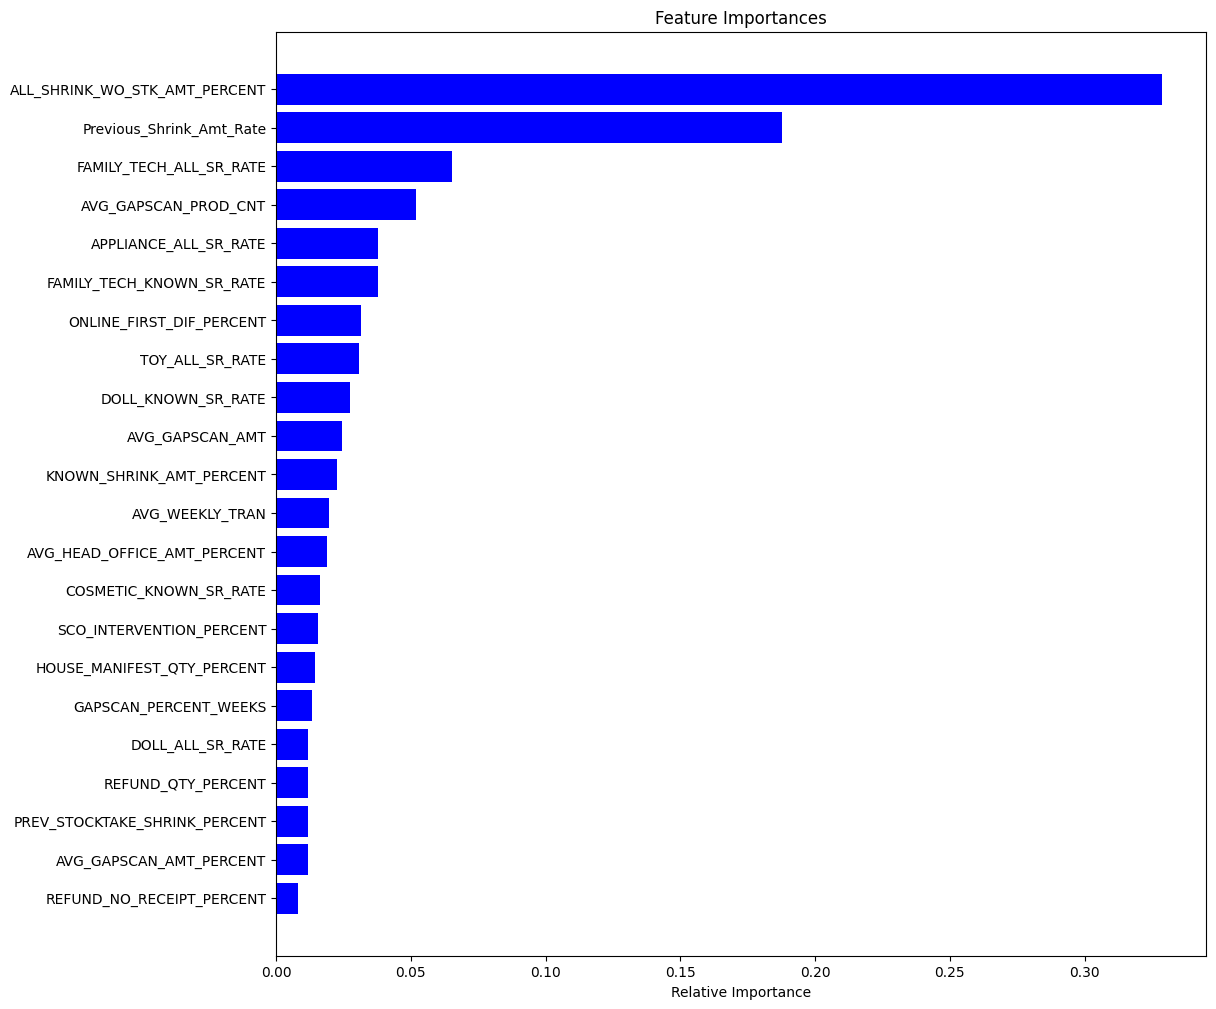

In [250]:
get_ipython().run_line_magic('matplotlib', 'inline')
features = X_train_Metro.columns
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], color='b',align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize = 10)
plt.xlabel('Relative Importance')

# Non Metro Model

#### New 2023 Stocktake Non Metro Model

In [251]:
#### New 2023 Stocktake Non Metro Model WITH LAST SHRINK RATE
# Creating Target and Regressor Subsets
Y_Non_Metro = data_NonMetro['Shrink_Amt_Rate']
# Predictor Variable
X_Non_Metro =  data_NonMetro[[
           'LOCATION_SOURCE_IDENTIFIER',
           'START_DATE', 'END_DATE',
           'AVG_WEEKLY_TRAN',
           'GAPSCAN_PERCENT_WEEKS',
           'AVG_GAPSCAN_PROD_CNT',
           'REFUND_TRAN_PERCENT',
           #'REFUND_QTY_PERCENT',
           #'REFUND_NO_RECEIPT_PERCENT',
           #'REFUND_NO_RECEIPT_QTY_PERCENT', 
           'SELF_CHECKOUT_PERCENT',
           'AVG_GAPSCAN_AMT_PERCENT',
           #'AVG_GAPSCAN_QTY_PERCENT',
           #'AVG_HEAD_OFFICE_AMT_PERCENT', 
           'AVG_HEAD_OFFICE_QTY_PERCENT',
           #'HOUSE_MANIFEST_QTY_PERCENT', 
           #'AVG_NEG_SOH_QTY_PERCENT',
           'AVG_NEG_SOH_AMT_PERCENT', 
           'AVG_NEG_SOH_PROD_CNT_PERCENT',
           #'KNOWN_SHRINK_AMT_PERCENT',
           'ALL_SHRINK_WO_STK_AMT_PERCENT',
           'ONLINE_FIRST_DIF_PERCENT',
           #'SCO_INTERVENTION_PERCENT',
           #'AVG_SOH_COST_AMT', 
           #'AVG_SALES_AMT',
           'AVG_GAPSCAN_AMT',
           'Previous_Shrink_Amt_Rate',
           'PREV_STOCKTAKE_SHRINK_PERCENT',
           'COSMETIC_KNOWN_SR_RATE',
           #'APPLIANCE_KNOWN_SR_RATE', 
           'DOLL_KNOWN_SR_RATE', 
           'TOY_KNOWN_SR_RATE',
           'FAMILY_TECH_KNOWN_SR_RATE',
           'COSMETIC_ALL_SR_RATE', 
           'APPLIANCE_ALL_SR_RATE', 
           'DOLL_ALL_SR_RATE',
           #'TOY_ALL_SR_RATE',
           'FAMILY_TECH_ALL_SR_RATE'
]]

# Split the data into train and test data:
X_train_Non_Metro_raw, X_test_Non_Metro_raw, Y_train_Non_Metro, Y_test_Non_Metro = train_test_split(X_Non_Metro, Y_Non_Metro, test_size = 0.2, random_state=123)
# Build the model with the random forest regression algorithm:
X_train_Non_Metro = X_train_Non_Metro_raw.drop(['LOCATION_SOURCE_IDENTIFIER','START_DATE','END_DATE'], axis=1)
X_test_Non_Metro = X_test_Non_Metro_raw.drop(['LOCATION_SOURCE_IDENTIFIER','START_DATE','END_DATE'], axis=1)
model_Non_Metro = RandomForestRegressor(max_depth=40, random_state=0, n_estimators=40, max_leaf_nodes=40)
model_Non_Metro.fit(X_train_Non_Metro, Y_train_Non_Metro)

# Make predictions on test data using the model trained on original data
predictions_Non_Metro = model_Non_Metro.predict(X_test_Non_Metro)
# Performance metrics
errors_Non_Metro = predictions_Non_Metro - Y_test_Non_Metro
abs_errors_Non_Metro = abs(predictions_Non_Metro - Y_test_Non_Metro)
abs_Y_test_Non_Metro = abs(Y_test_Non_Metro)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(abs_errors_Non_Metro), 5), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape_Non_Metro = 100 * (abs_errors_Non_Metro / abs_Y_test_Non_Metro)
# Calculate and display accuracy
accuracy_Non_Metro = 100 - np.mean(mape_Non_Metro)
print('Accuracy Non Metro:', round(accuracy_Non_Metro, 2), '%.')
print('Mape Non Metro:', round(np.mean(mape_Non_Metro), 2), '%.')
print('Mape Non Metro Max:', round(np.max(mape_Non_Metro), 2), '%.')
print('Abs Error Non Metro Max:', round(np.max(abs_errors_Non_Metro)*100, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.00228 degrees.
Accuracy Non Metro: 84.54 %.
Mape Non Metro: 15.46 %.
Mape Non Metro Max: 58.94 %.
Abs Error Non Metro Max: 0.88 %.


In [252]:
predictions_train_Non_Metro = model_Non_Metro.predict(X_train_Non_Metro)
# Performance metrics
errors_train_Non_Metro = predictions_train_Non_Metro - Y_train_Non_Metro
abs_errors_train_Non_Metro = abs(predictions_train_Non_Metro - Y_train_Non_Metro)
abs_Y_train_Non_Metro = abs(Y_train_Non_Metro)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(abs_errors_train_Non_Metro), 5), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape_train_Non_Metro = 100 * (abs_errors_train_Non_Metro / abs_Y_train_Non_Metro)
# Calculate and display accuracy
accuracy_train_Non_Metro = 100 - np.mean(mape_train_Non_Metro)
print('Accuracy Non Metro:', round(accuracy_train_Non_Metro, 2), '%.')
print('Mape Non Metro:', round(np.mean(mape_train_Non_Metro), 2), '%.')
print('Mape Non Metro Max:', round(np.max(mape_train_Non_Metro), 2), '%.')
print('Abs Error Non Metro Max:', round(np.max(abs_errors_train_Non_Metro)*100, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.00158 degrees.
Accuracy Non Metro: 86.12 %.
Mape Non Metro: 13.88 %.
Mape Non Metro Max: 413.16 %.
Abs Error Non Metro Max: 0.96 %.


In [253]:
model_Non_Metro.feature_importances_

array([0.02375994, 0.04771534, 0.01381234, 0.01458366, 0.02262637,
       0.01045218, 0.01180574, 0.02734316, 0.01904248, 0.19470547,
       0.11001147, 0.03871703, 0.24227891, 0.01089521, 0.04138909,
       0.0175297 , 0.02275268, 0.02635629, 0.02669457, 0.0310009 ,
       0.01718195, 0.02934551])

In [254]:
importances = model_Non_Metro.feature_importances_
indices = np.argsort(importances)
print(indices)

[ 5 13  6  2  3 20 15  8  4 16  0 17 18  7 21 19 11 14  1 10  9 12]


Text(0.5, 0, 'Relative Importance')

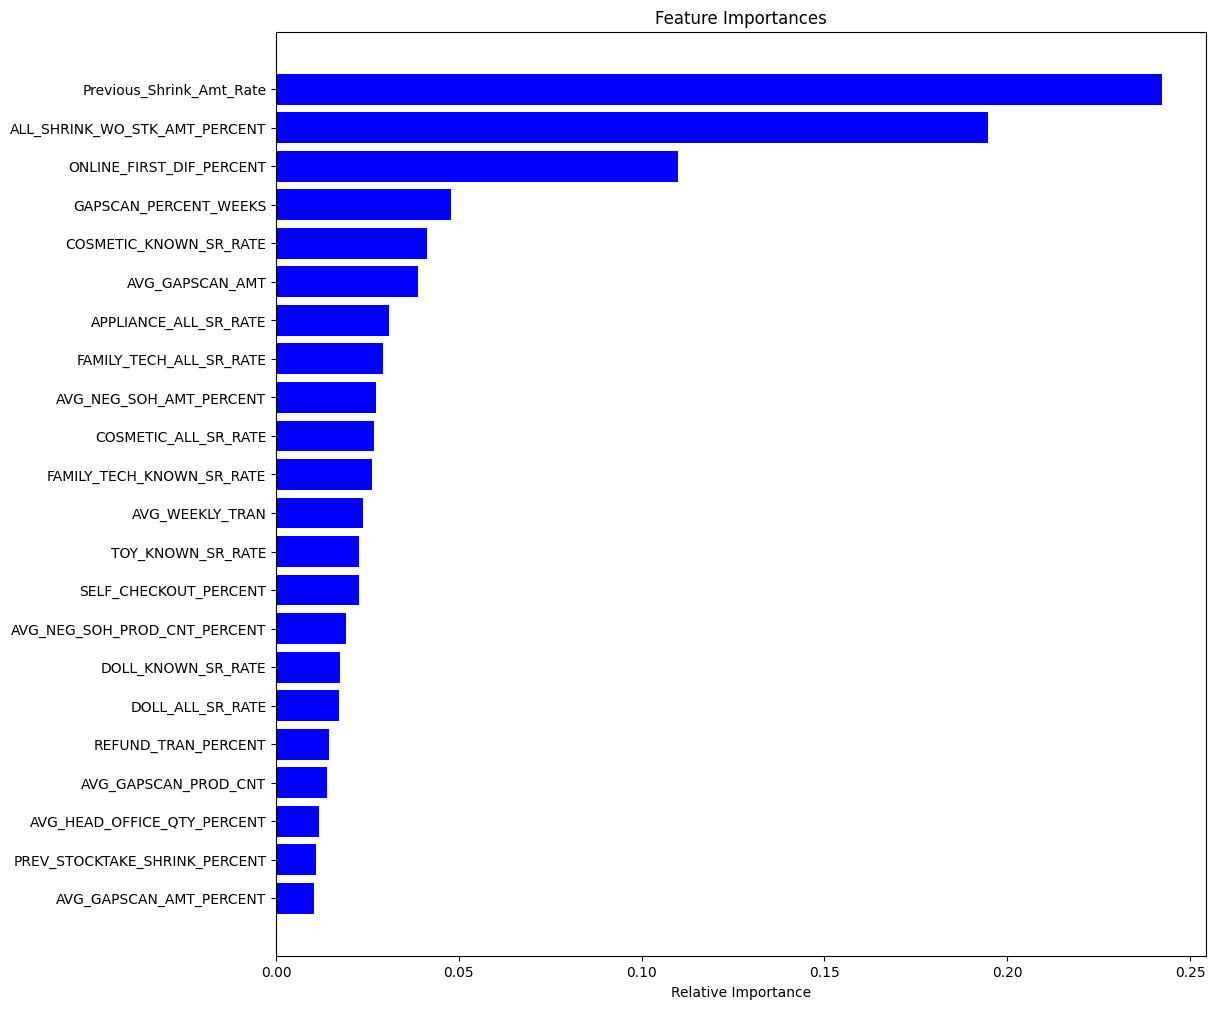

In [255]:
get_ipython().run_line_magic('matplotlib', 'inline')
features = X_train_Non_Metro.columns
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], color='b',align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize = 10)
plt.xlabel('Relative Importance')